In [18]:
import pm4py
%load_ext autoreload
%autoreload 2
import os
print(os.getcwd())
os.chdir('/home/vco/Projects/pm4py-dcr') # working directory should be pm4py-dcr (the one behind notebooks)
print(os.getcwd())
os.environ['PM4PY_SHOW_EVENT_LOG_DEPRECATION'] = 'false'
import numpy as np
np.seterr(divide = 'ignore') 
pm4py.util.constants.SHOW_EVENT_LOG_DEPRECATION = False

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
/home/vco/Projects/pm4py-dcr
/home/vco/Projects/pm4py-dcr


In [212]:
from copy import deepcopy
import time
from pm4py.algo.discovery.dcr_discover import algorithm as dcr_alg
from pm4py.algo.discovery.dcr_discover.algorithm import Variants
from pm4py.objects.dcr.utils.dcr_utils import time_to_int, clean_input
from pm4py.objects.dcr.exporter import exporter as dcr_exporter
from pm4py.objects.conversion.dcr import converter as dcr_to_tapn
from pm4py.objects.petri_net.importer.variants import tapn as tapn_importer
from pm4py.vis import view_petri_net
import pm4py.objects.petri_net.utils.final_marking as discover_fm

# Experiment config

In [3]:
config = {'variant': Variants.DCR_BASIC, 'timed':True,'pending':True}

# Datasets

In [4]:
# all bpi + sepsis + rtfmp + dreyers + pdc
logs_list = {}
logs_folder = '/home/vco/Datasets/data/TKDE_Benchmark'
# pdc_folders = {'PDC19':'/home/vco/Datasets/PDC19', 
#                'PDC20':'/home/vco/Datasets/PDC20', 
#                'PDC21':'/home/vco/Datasets/PDC21', 
#                'PDC22':'/home/vco/Datasets/PDC22', 
#                'PDC23':'/home/vco/Datasets/PDC23'}
for file in os.listdir(logs_folder):
    if file.endswith(".xes"):
        name = os.path.basename(file.split('.')[0])
        logs_list[name] = os.path.join(logs_folder, file)
logs_list = logs_list | { 
    # 'Dreyers':'/home/vco/Datasets/Dreyers Foundation.xes',
    # 'BPIC19' :'/home/vco/Datasets/BPI_Challenge_2019.xes',
    'BPIC20DD' :'/home/vco/Datasets/BPI2020/DomesticDeclarations.xes',
    'BPIC20ID' :'/home/vco/Datasets/BPI2020/InternationalDeclarations.xes',
    'BPIC20PL' :'/home/vco/Datasets/BPI2020/PermitLog.xes',
    'BPIC20PTC' :'/home/vco/Datasets/BPI2020/PrepaidTravelCost.xes',
    'BPIC20RFP' :'/home/vco/Datasets/BPI2020/RequestForPayment.xes',
    'BPIC17':'/home/vco/Datasets/BPI Challenge 2017.xes',
    'BPIC17-Offer':'/home/vco/Datasets/BPI Challenge 2017 - Offer log.xes'              
    } #| pdc_folders
print(f'[i] Prepared for benchmarking on {len(logs_list)} logs')
print(logs_list)

[i] Prepared for benchmarking on 19 logs
{'RTFMP': '/home/vco/Datasets/data/TKDE_Benchmark/RTFMP.xes', 'BPIC17_f': '/home/vco/Datasets/data/TKDE_Benchmark/BPIC17_f.xes', 'BPIC13_i': '/home/vco/Datasets/data/TKDE_Benchmark/BPIC13_i.xes', 'BPIC15_1f': '/home/vco/Datasets/data/TKDE_Benchmark/BPIC15_1f.xes', 'BPIC15_3f': '/home/vco/Datasets/data/TKDE_Benchmark/BPIC15_3f.xes', 'BPIC15_4f': '/home/vco/Datasets/data/TKDE_Benchmark/BPIC15_4f.xes', 'BPIC14_f': '/home/vco/Datasets/data/TKDE_Benchmark/BPIC14_f.xes', 'BPIC15_5f': '/home/vco/Datasets/data/TKDE_Benchmark/BPIC15_5f.xes', 'BPIC12': '/home/vco/Datasets/data/TKDE_Benchmark/BPIC12.xes', 'BPIC15_2f': '/home/vco/Datasets/data/TKDE_Benchmark/BPIC15_2f.xes', 'SEPSIS': '/home/vco/Datasets/data/TKDE_Benchmark/SEPSIS.xes', 'BPIC13_cp': '/home/vco/Datasets/data/TKDE_Benchmark/BPIC13_cp.xes', 'BPIC20DD': '/home/vco/Datasets/BPI2020/DomesticDeclarations.xes', 'BPIC20ID': '/home/vco/Datasets/BPI2020/InternationalDeclarations.xes', 'BPIC20PL': '/hom

In [12]:
for log in ['BPIC15_1f','BPIC15_2f','BPIC15_3f','BPIC15_4f','BPIC15_5f']:
    bpic15 = pm4py.read_xes(logs_list[log],show_progress_bar=False)
    dcr_model, _ = dcr_alg.apply(bpic15,**config)
    print(f"[i] {log} has {bpic15['concept:name'].nunique()} unique events")
    dcr_exporter.apply(dcr_model,f'models/dcrbpic15/{log}.xml')

[i] Mining with basic DisCoveR
[i] Converting to old event log!
[i] BPIC15_1f has 70 unique events
[i] Mining with basic DisCoveR
[i] Converting to old event log!
[!] Event 01_HOOFD_380 not enabled!
[!] Event 01_HOOFD_430 not enabled!
[!] Event 01_HOOFD_480 not enabled!
[!] Event 01_HOOFD_520 not enabled!
[!] Event 01_HOOFD_530 not enabled!
[!] Event 01_HOOFD_380 not enabled!
[!] Event 01_HOOFD_430 not enabled!
[!] Event 01_HOOFD_480 not enabled!
[!] Event 01_HOOFD_520 not enabled!
[!] Event 01_HOOFD_530 not enabled!
[!] Event 01_HOOFD_380 not enabled!
[!] Event 01_HOOFD_430 not enabled!
[!] Event 01_HOOFD_480 not enabled!
[!] Event 01_HOOFD_520 not enabled!
[!] Event 01_HOOFD_530 not enabled!
[!] Event 01_HOOFD_380 not enabled!
[!] Event 01_HOOFD_430 not enabled!
[!] Event 01_HOOFD_480 not enabled!
[!] Event 01_HOOFD_520 not enabled!
[!] Event 01_HOOFD_530 not enabled!
[!] Event 01_HOOFD_380 not enabled!
[!] Event 01_HOOFD_430 not enabled!
[!] Event 01_HOOFD_480 not enabled!
[!] Event

In [5]:
logs_list.pop('BPIC15_1f') # converting to a PN causes pycharm to crash (I suspect it runs out of RAM, try it in the terminal.
logs_list.pop('BPIC15_2f') # converting to a PN causes pycharm to crash (I suspect it runs out of RAM, try it in the terminal.
logs_list.pop('BPIC15_3f') # converting to a PN causes pycharm to crash (I suspect it runs out of RAM, try it in the terminal.
logs_list.pop('BPIC15_4f') # converting to a PN causes pycharm to crash (I suspect it runs out of RAM, try it in the terminal.
logs_list.pop('BPIC15_5f') # converting to a PN causes pycharm to crash (I suspect it runs out of RAM, try it in the terminal.

'/home/vco/Datasets/data/TKDE_Benchmark/BPIC15_5f.xes'

In [18]:
logs_list.pop('BPIC17_f') # finished before
logs_list.pop('BPIC13_i') # finished before
logs_list.pop('RTFMP') # finished before
logs_list.pop('SEPSIS') # finished before
logs_list.pop('BPIC14_f') # finished before
logs_list.pop('BPIC12') # finished before
logs_list.pop('BPIC13_cp') # finished before
logs_list.pop('Dreyers') # dreyers no timestamp before

'/home/vco/Datasets/Dreyers Foundation.xes'

In [6]:
logs_list.keys()

dict_keys(['RTFMP', 'BPIC17_f', 'BPIC13_i', 'BPIC14_f', 'BPIC12', 'SEPSIS', 'BPIC13_cp', 'BPIC17', 'BPIC17-Offer'])

In [14]:
def train_dcr_model(train,log_name, config):
    dcr_model, _ = dcr_alg.apply(train, **config)
    if log_name == 'SEPSIS':
        dcr_model = time_to_int(dcr_model, precision = 'hours')
    else:
        dcr_model = time_to_int(dcr_model, precision = 'days')
    dcr_model = clean_input(dcr_model,white_space_replacement='_')
    dcr_exporter.apply(dcr_model,f'models/tapnminer_dcr_compare/{log_name}.xml')
    print(f'[!TAPN] Starting conversion for: models/{log_name}.tapn')
    tapn, im = dcr_to_tapn.apply(dcr_model,variant=dcr_to_tapn.Variants.TO_INHIBITOR_NET, parameters={'preoptimize':True, 'postoptimize':True, 'map_unexecutable_events':False, 'debug':False,'tapn_path':f'models/{log_name}_untimed.tapn'})
    fm = discover_fm.discover_final_marking(tapn)
    print(f'[!TAPN] Done! Net saved in: models/{log_name}.tapn')
    return tapn, im, fm, dcr_model

def score_based_on_config(train, config, log_name):
    start_time = time.time()
    tapn, im, fm, dcr_model = train_dcr_model(train,log_name, config)
    elapsed = time.time() - start_time

def score_everything(logs_name_path_dict, configs=None):
    if configs is None:
        print('[X] MUST PASS A CONFiG!!!!!!')
        return
    # sub_folders = ['Ground Truth Logs', 'Test Logs', 'Training Logs']
    # now just take all .xes files and make sure they match across folders
    # temp_results = []
    for l_name, log_path in logs_name_path_dict.items():
        print(f'[i] Started for {l_name}')
        single_log = pm4py.read_xes(log_path, return_legacy_log_object=True, show_progress_bar=False)
        # i = 0
        # for config in configs:
        #     if 'alg_name' not in config:
        #         config['alg_name'] = f'config {i}'
        #         i += 1
        score_based_on_config(single_log, config, l_name)
            # temp_results.append()

    # results = pd.DataFrame(
    #     columns=['Log name', 'Algorithm'],
    #     data=temp_results)
    # results.to_csv(path_or_buf='/home/vco/Projects/pm4py-dcr/models/tapn_results.csv', index=False)
    # return results

In [15]:
# all
score_everything(logs_list, configs=config)

[i] Started for RTFMP
[i] Mining with basic DisCoveR
[!TAPN] Starting conversion for: models/RTFMP.tapn
[!TAPN] Done! Net saved in: models/RTFMP.tapn
[i] Started for BPIC17_f
[i] Mining with basic DisCoveR
[!TAPN] Starting conversion for: models/BPIC17_f.tapn
[!TAPN] Done! Net saved in: models/BPIC17_f.tapn
[i] Started for BPIC13_i
[i] Mining with basic DisCoveR
[!TAPN] Starting conversion for: models/BPIC13_i.tapn
[!TAPN] Done! Net saved in: models/BPIC13_i.tapn
[i] Started for BPIC14_f
[i] Mining with basic DisCoveR
[!TAPN] Starting conversion for: models/BPIC14_f.tapn
[!TAPN] Done! Net saved in: models/BPIC14_f.tapn
[i] Started for BPIC12
[i] Mining with basic DisCoveR
[!TAPN] Starting conversion for: models/BPIC12.tapn
[!TAPN] Done! Net saved in: models/BPIC12.tapn
[i] Started for SEPSIS
[i] Mining with basic DisCoveR
[!TAPN] Starting conversion for: models/SEPSIS.tapn
[!TAPN] Done! Net saved in: models/SEPSIS.tapn
[i] Started for BPIC13_cp
[i] Mining with basic DisCoveR
[!TAPN] St

In [5]:
log_name = 'RTFMP'
log = pm4py.read_xes(logs_list[log_name])

parsing log, completed traces ::   0%|          | 0/150370 [00:00<?, ?it/s]

In [198]:
from pm4py.objects.petri_net.timed_arc_net import semantics as tapn_semantics
# tapn_semantics = s.TimedArcSemantics()
from pm4py.objects.petri_net.utils import petri_utils as pn_utils
from pm4py.objects.petri_net import properties
from pm4py.objects.petri_net.timed_arc_net.obj import TimedArcNet
from pm4py.objects.petri_net.timed_arc_net.obj import TimedMarking

{(init_CreateFine0, 'Create Fine')}
{(init_SendFine1, 'Send Fine'), (event_SendAppealtoPrefecture1, 'Send Appeal to Prefecture'), (event_Payment1, 'Payment'), (event_InsertDateAppealtoPrefecture1, 'Insert Date Appeal to Prefecture'), (event_AppealtoJudge1, 'Appeal to Judge')}


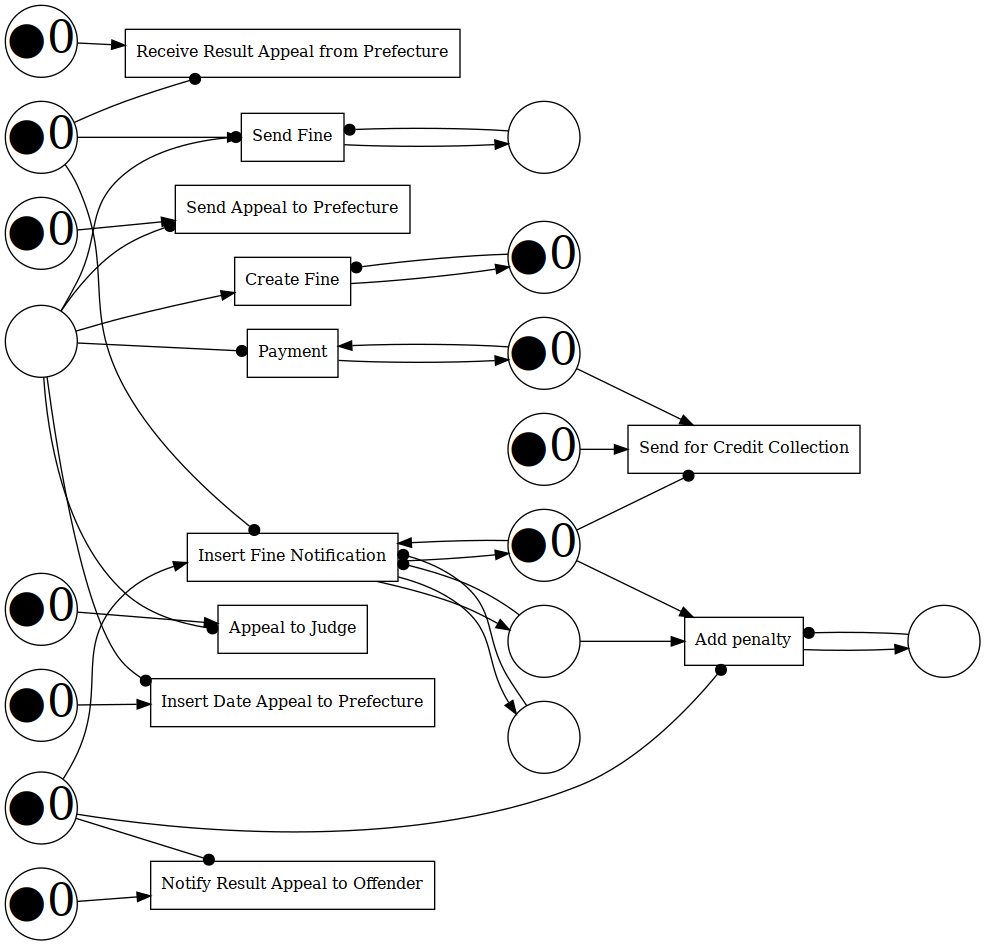

In [213]:
pn,im,fm = tapn_importer.import_net(f'models/{log_name}.tapn')
fm = discover_fm.discover_final_marking(pn)
print(tapn_semantics.enabled_transitions(pn,im))
et = tapn_semantics.enabled_transitions(pn,im)
m = tapn_semantics.execute(list(et)[0],pn,im)
print(tapn_semantics.enabled_transitions(pn,m))
view_petri_net(pn,m)

In [299]:
def transform_to_wfnet(pn,im):
    wf_net = pn
    wf_im = TimedMarking()
    start_transition = TimedArcNet.Transition(name='Start')
    end_transition = TimedArcNet.Transition(name='End')
    wf_net.transitions.add(start_transition)
    wf_net.transitions.add(end_transition)
    for p in im:
        pn_utils.add_arc_from_to(start_transition,pn_utils.get_place_by_name(wf_net,p.name),wf_net)
    for p in wf_net.places:
        if 'pending' in p.name and not 'excluded' in p.name:
            pn_utils.add_arc_from_to(p,end_transition,wf_net,type='inhibitor')
        else:
            pn_utils.add_arc_from_to(p,end_transition,wf_net,type='reset')
    source_place = TimedArcNet.Place(f'source')
    wf_net.places.add(source_place)
    wf_im[source_place] = 1
    sink_place = TimedArcNet.Place(f'sink')
    wf_net.places.add(sink_place)
    pn_utils.add_arc_from_to(source_place,start_transition,wf_net)
    pn_utils.add_arc_from_to(end_transition,sink_place,wf_net)
    
    wf_fm = TimedMarking()
    wf_fm[sink_place] = 1
    
    return wf_net, wf_im, wf_fm

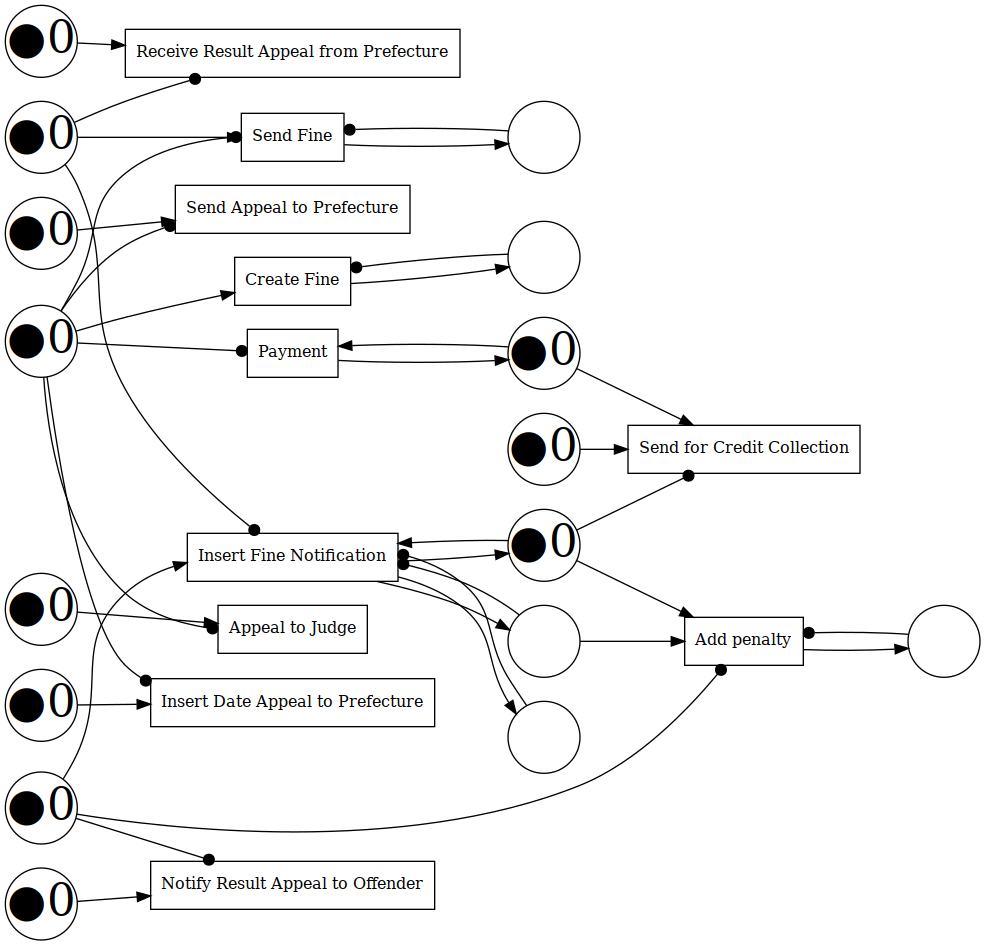

In [300]:
view_petri_net(pn,im)

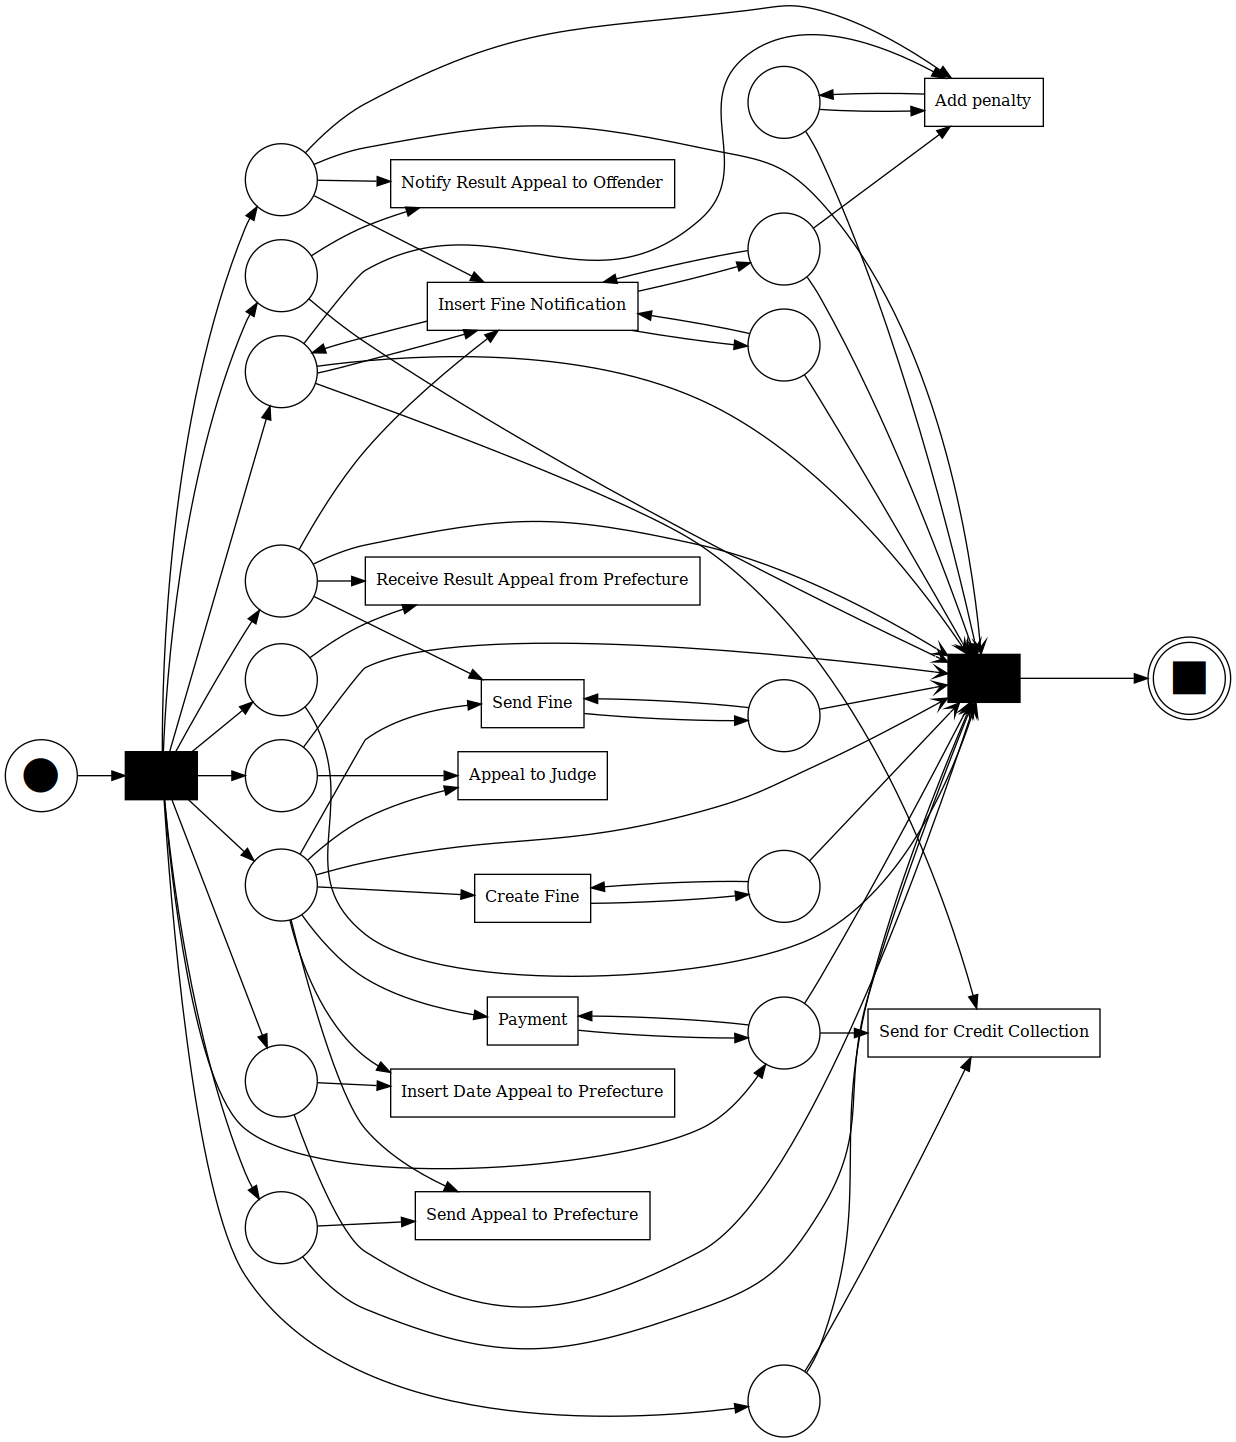

In [301]:
wf_net, wf_im, wf_fm = transform_to_wfnet(deepcopy(pn),deepcopy(im))
view_petri_net(wf_net,wf_im,wf_fm)

In [302]:
pm4py.check_soundness(wf_net,wf_im,wf_fm)

(False,
 {'s_c_net': places: [ executed_Addpenalty, executed_CreateFine, executed_InsertFineNotification, executed_SendFine, included_Addpenalty, included_AppealtoJudge, included_CreateFine, included_InsertDateAppealtoPrefecture, included_InsertFineNotification, included_NotifyResultAppealtoOffender, included_Payment, included_ReceiveResultAppealfromPrefecture, included_SendAppealtoPrefecture, included_SendFine, included_SendforCreditCollection, pending_Addpenalty_by_InsertFineNotification, sink, source ]
  transitions: [ (End, None), (Start, None), (event_AppealtoJudge1, 'Appeal to Judge'), (event_InsertDateAppealtoPrefecture1, 'Insert Date Appeal to Prefecture'), (event_NotifyResultAppealtoOffender1, 'Notify Result Appeal to Offender'), (event_Payment1, 'Payment'), (event_ReceiveResultAppealfromPrefecture1, 'Receive Result Appeal from Prefecture'), (event_SendAppealtoPrefecture1, 'Send Appeal to Prefecture'), (event_SendforCreditCollection3, 'Send for Credit Collection'), (init_Creat

In [287]:
pn_utils.get_transition_by_label(pn,'')

{(event_AppealtoJudge1, 'Appeal to Judge'),
 (event_InsertDateAppealtoPrefecture1, 'Insert Date Appeal to Prefecture'),
 (event_NotifyResultAppealtoOffender1, 'Notify Result Appeal to Offender'),
 (event_Payment1, 'Payment'),
 (event_ReceiveResultAppealfromPrefecture1, 'Receive Result Appeal from Prefecture'),
 (event_SendAppealtoPrefecture1, 'Send Appeal to Prefecture'),
 (event_SendforCreditCollection3, 'Send for Credit Collection'),
 (init_CreateFine0, 'Create Fine'),
 (init_InsertFineNotification3, 'Insert Fine Notification'),
 (init_SendFine1, 'Send Fine'),
 (initpend_Addpenalty_by_InsertFineNotification1, 'Add penalty')}

In [303]:
pm4py.fitness_token_based_replay(log, pn, im, fm) # fast results; less accurate/explainable

replaying log with TBR, completed variants ::   0%|          | 0/231 [00:00<?, ?it/s]

{'perc_fit_traces': 0.0,
 'average_trace_fitness': 0.6588537978662593,
 'log_fitness': 0.6692070763940337,
 'percentage_of_fitting_traces': 0.0}

In [304]:
pm4py.fitness_alignments(log,wf_net,wf_im,wf_fm)

Exception: trying to apply alignments on a Petri net that is not a easy sound net!!

In [305]:
pm4py.precision_token_based_replay(log, pn, im, fm)

replaying log with TBR, completed variants ::   0%|          | 0/271 [00:00<?, ?it/s]

0.848506287754524

In [297]:
from pm4py.algo.evaluation.generalization import algorithm as gen_alg

In [306]:
gen_alg.apply(log,pn,im,fm)

replaying log with TBR, completed variants ::   0%|          | 0/231 [00:00<?, ?it/s]

0.9855500389488964